# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

print(df.head(), df.columns, df.shape)

       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0       

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## Answers
1. The data set chosen is the World Happiness Report (WHR) data set (WHR2018Chapter2OnlineData.csv).
2. I will be predicting the happiness score of a country "Standard deviation/Mean of ladder by country-year"
3. This is a supervised learning problem because we have labeled data where the Life Ladder score (happiness score) is known for each data point. This is a regression problem because we are predicting a continuous numerical value (the Life Ladder score).
4. The initial list of features includes: Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15 Gini of household income reported in Gallup
5. Companies can use these insights to align their corporate social responsibility (CSR) initiatives with factors that enhance happiness in the communities they operate in. This alignment can improve their public image and foster goodwill.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Inspecting Data
# Descriptive statistics
print(df.describe())

# Data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

              year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476                      0.25753

In [4]:
# Data Preparation

# Handling missing values by replacing them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify if all missing values have been handled
print(df.isnull().sum())

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

/tmp/ipykernel_1668/967403283.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


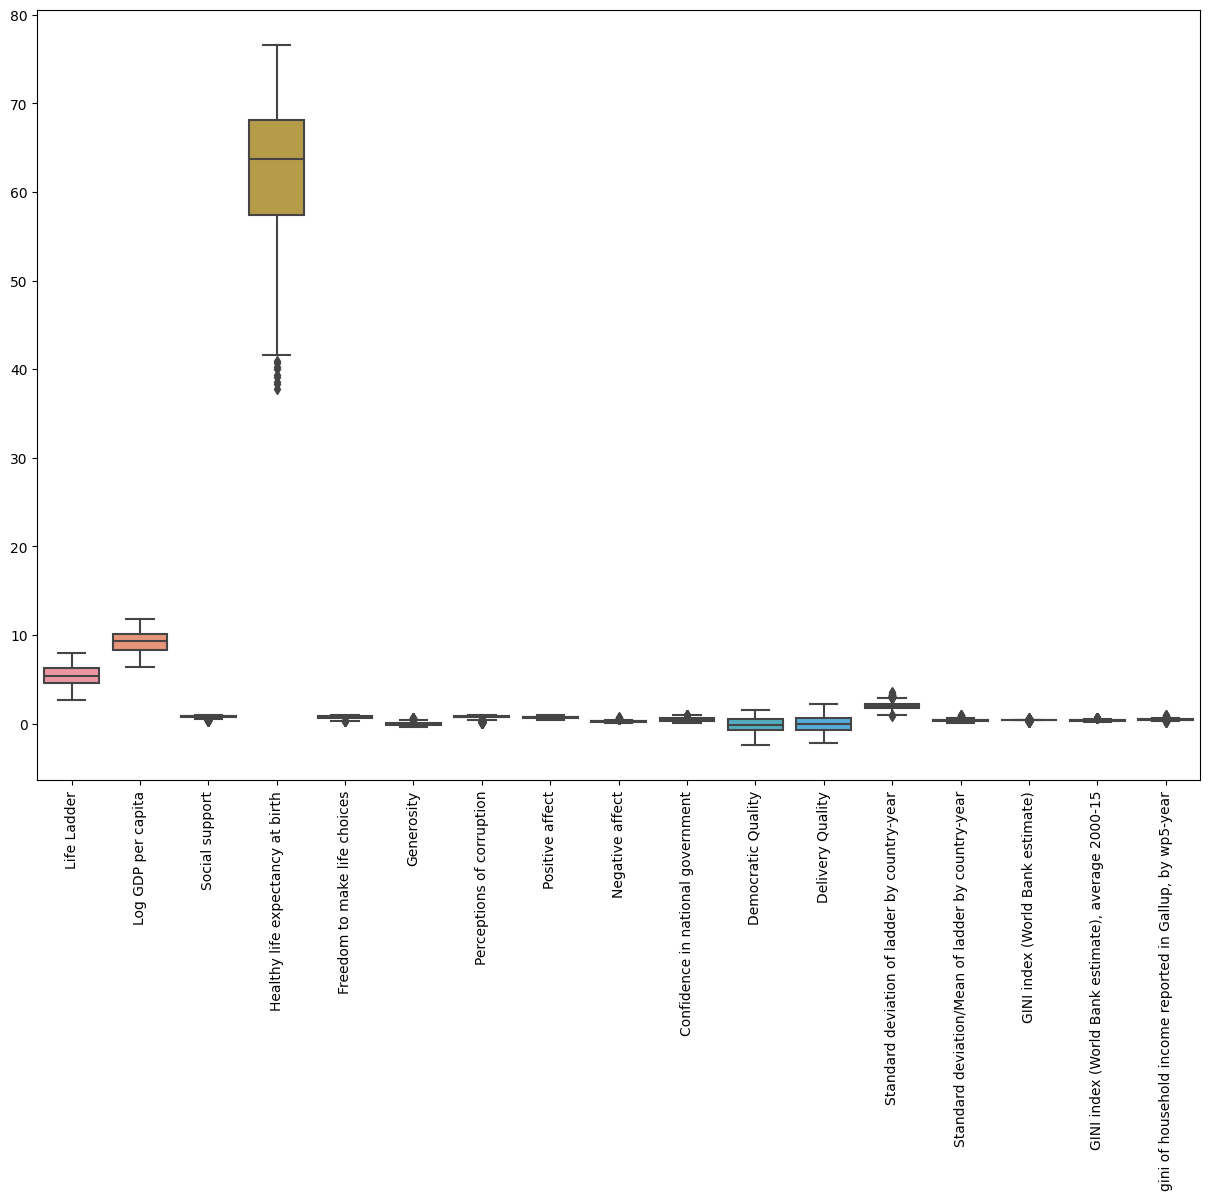

In [5]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.float64]))
plt.xticks(rotation=90)
plt.show()

In [6]:
# Data preparation
df.fillna(df.mean(), inplace=True)

# Extract features and label
X = df.drop(columns=['country', 'year', 'Life Ladder'])
y = df['Life Ladder']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

/tmp/ipykernel_1668/547887690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

## Answers
Feature List: Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15, Gini of household income reported in Gallup.

Data Preparation Techniques:

- Handling missing values: Missing values will be replaced with the mean of their respective columns.
Standardization: Features will be standardized to ensure they are on the same scale.
Model:

- The primary model will be a Linear Regression model due to the regression nature of the problem.

- Model Building, Validation, and Selection Plan:
  - Data Splitting: Split the data into training and testing sets using an 80/20 ratio.
  - Model Training: Train the Linear Regression model on the training set.
  - Model Evaluation: Evaluate the model on the testing set using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
  - Model Improvement:Experiment with additional models such as Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.| Perform hyperparameter tuning using cross-validation to find the best set of hyperparameters. | Feature selection and engineering to identify and include relevant features that improve model performance. | Analyze residuals and iterate on model improvements.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the model and hyperparameter grid for each model
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regressor': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest Regressor': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting Regressor': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}

In [10]:
# Initialize dictionaries to store results
best_models = {}
best_params = {}
results = {}

In [11]:
# Train and evaluate each model
for name, (model, params) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    
    # Evaluate the best model
    y_pred = best_models[name].predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Best Parameters': best_params[name],
        'MAE': mae,
        'MSE': mse,
        'R^2': r2
    }

# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R^2 Score: {metrics['R^2']}")

Training Linear Regression...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...

Linear Regression:
Best Parameters: {}
Mean Absolute Error: 0.21194384313584438
Mean Squared Error: 0.08211786247469552
R^2 Score: 0.9364900580113387

Decision Tree Regressor:
Best Parameters: {'max_depth': 30, 'min_samples_split': 10}
Mean Absolute Error: 0.2094317537742774
Mean Squared Error: 0.08844075252259698
R^2 Score: 0.9315999358376563

Random Forest Regressor:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.1514662126355269
Mean Squared Error: 0.04964989183784631
R^2 Score: 0.9616007814215013

Gradient Boosting Regressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Absolute Error: 0.10763145862826728
Mean Squared Error: 0.02262647152873837
R^2 Score: 0.9825006904601166


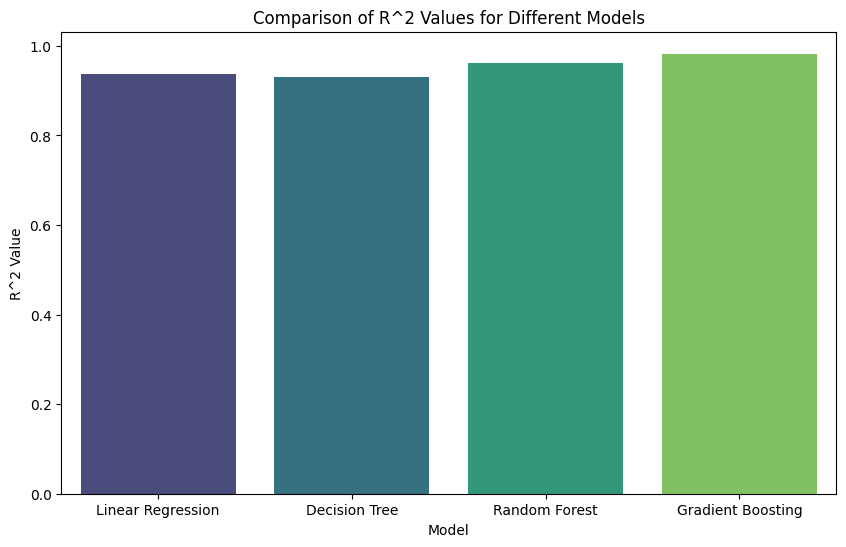

In [13]:
# Plotting R^2 value of each model
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_values = [0.9364900580113387, 0.9315999358376563, 0.9616007814215013, 0.9825006904601166] 

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': models,
    'R^2 Value': r2_values
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2 Value', data=results_df, palette='viridis')

# Add title and labels
plt.title('Comparison of R^2 Values for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2 Value')

# Display the plot
plt.show()

# Evaluation & Summary
## Performance Analysis:
- Gradient Boosting Regressor demonstrated the highest performance among the models, achieving the lowest Mean Absolute Error (0.1076), Mean Squared Error (0.0226), and the highest R² Score (0.9825). This indicates that the Gradient Boosting Regressor provides the most accurate predictions with minimal error and a high degree of explained variance.

- The Random Forest Regressor also showed strong performance, with a low Mean Absolute Error (0.1515), Mean Squared Error (0.0496), and a high R² Score (0.9616). It is slightly less effective compared to Gradient Boosting but still provides robust predictive performance.

- The Linear Regression and Decision Tree Regressor performed reasonably well, though they were less effective compared to the ensemble methods. The Linear Regression model had a Mean Absolute Error of 0.2119 and an R² Score of 0.9365, while the Decision Tree Regressor had a Mean Absolute Error of 0.2094 and an R² Score of 0.9316. These results suggest that while these models are decent, they do not capture the data complexities as effectively as the ensemble methods.

## Conclusion:
In conclusion, the Gradient Boosting Regressor is the most effective model for this dataset, providing the most accurate predictions and highest explanatory power. The Random Forest Regressor also performs well and can be considered a strong alternative. Linear Regression and Decision Tree Regressor are less effective but still offer valuable insights and are useful for baseline comparisons.
